In [1]:
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
from diff_exp import *

# Linear Systems of Differential Equations

Let $y = (y_1(t),..., y_n(t))$ and $M = M(t)$ matrix with dimensions $n \times n$. The linear system of differential equations:

\begin{equation}
\frac{dy}{dt} = M y
\end{equation}

with initial point values $y(t = t_0) = y_0$ can be solved nummericaly using integrators (e.g. Runge-Kutta). But it has analytical solution using matrix exponent:

\begin{equation}
y(t) = e^{\int_{t_0}^t M(t) dt} y_0
\end{equation}

The simple script *diff_exp.py* implements both ways for obtaining solutions, and here is the comparison of the so solutions.

First two examples cover the case where $M$ is constant matrix.

In [2]:
M = np.array([[0,1], [1,-2]])
y0 = np.array([[1],[2]])
ti = 2
tf = 5
dt = 0.01

In [3]:
y, t = sol_lin_system_ode_c(y0, ti, tf, dt, M)

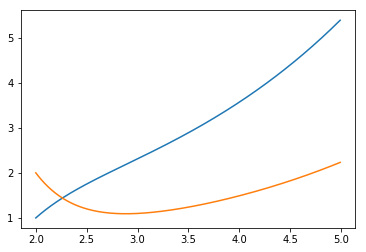

In [4]:
plt.plot(t, y[0])
plt.plot(t, y[1])
plt.show()

In [5]:
y0 = np.array([1, 2])
x, t = lin_system_ivp_c(y0, ti, tf, dt, M)

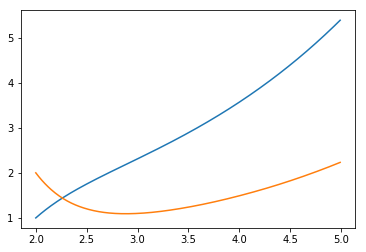

In [6]:
plt.plot(t, x[0])
plt.plot(t, x[1])
plt.show()

In [7]:
M = np.array([[0, 1, 0, -1], [1,-2, 5, 0], [0, 1, 2, 3], [-1, -2, 0, -5]])
y0 = np.array([[1],[2],[5],[0]])
ti = 2
tf = 5
dt = 0.01

In [8]:
y, t = sol_lin_system_ode_c(y0, ti, tf, dt, M)

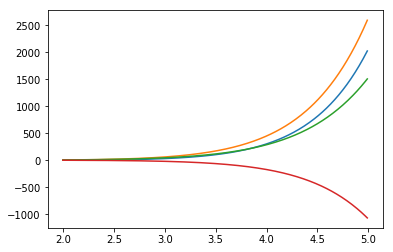

In [9]:
plt.plot(t, y[0])
plt.plot(t, y[1])
plt.plot(t, y[2])
plt.plot(t, y[3])
plt.show()

In [10]:
y0 = np.array([1, 2, 5, 0])
x, t = lin_system_ivp_c(y0, ti, tf, dt, M)

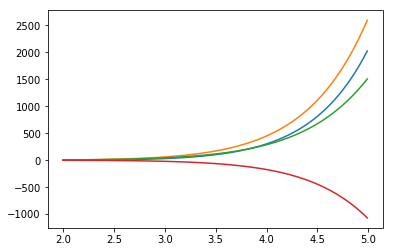

In [11]:
plt.plot(t, x[0])
plt.plot(t, x[1])
plt.plot(t, x[2])
plt.plot(t, x[3])
plt.show()

Let's compare two solutions:

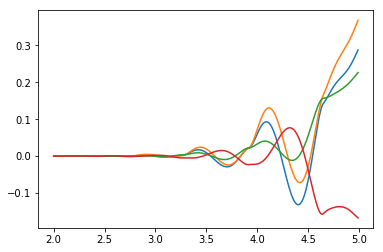

In [12]:
plt.plot(t, x[0]-y[0])
plt.plot(t, x[1]-y[1])
plt.plot(t, x[2]-y[2])
plt.plot(t, x[3]-y[3])
plt.show()

And the relative errors: (*Warning* division with $0$ possible)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


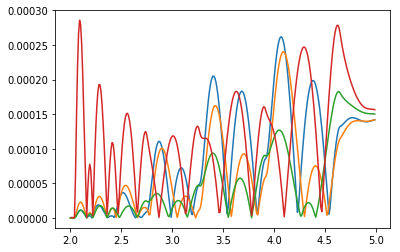

In [13]:
plt.plot(t, np.abs(x[0]-y[0])/np.abs(y[0]))
plt.plot(t, np.abs(x[1]-y[1])/np.abs(y[1]))
plt.plot(t, np.abs(x[2]-y[2])/np.abs(y[2]))
plt.plot(t, np.abs(x[3]-y[3])/np.abs(y[3]))
plt.show()

Next example covers the case where $M$ is function of $t$.

In [14]:
M = lambda t: np.array([[-t, 1], [np.exp(-t), -t**2]])
y0 = np.array([[1], [3]])
ti = 0
tf = 3
dt = 0.001

In [15]:
y, t = sol_lin_system_ode_l(y0, ti, tf, dt, M)

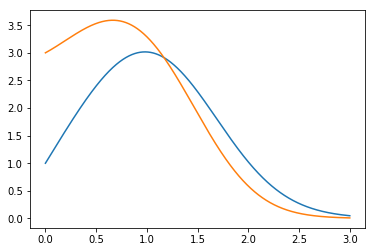

In [16]:
plt.plot(t, y[0])
plt.plot(t, y[1])
plt.show()

In [17]:
y0 = np.array([1, 3])
x, t = lin_system_ivp_l(y0, ti, tf, dt, M)

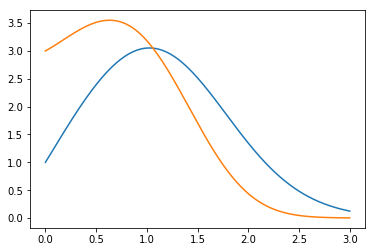

In [18]:
plt.plot(t, x[0])
plt.plot(t, x[1])
plt.show()

To conclude, the Runge-Kutta method is way more efficient than matrix exponent method.